In [4]:
!pip install pgmpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install numpy pandas scipy network matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for network: filename=network-0.1-py3-none-any.whl size=3143 sha256=b77b3dc4b536a05ea34709f8a9ae97877be1890aa68a0a140c6e6dc9c67bc453
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\e7\5a\7a\7f15bea66afb5505b9d10cc7bd8964cb77f0ce736df5b104c8
Successfully built network


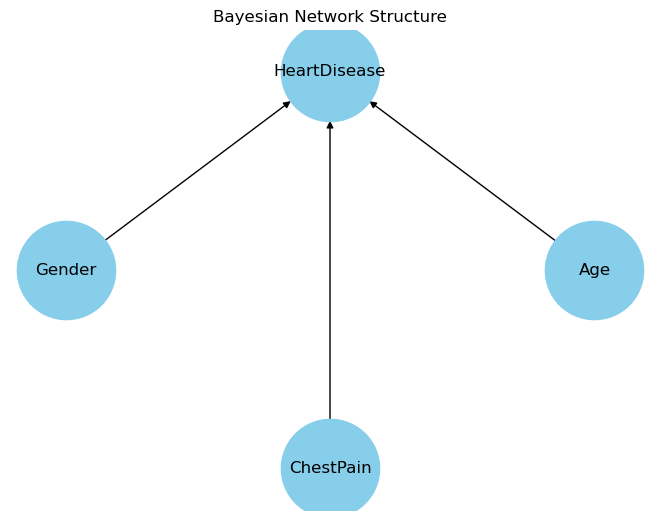

CPD of Age
+---------+-----+
| Age(30) | 0.2 |
+---------+-----+
| Age(40) | 0.2 |
+---------+-----+
| Age(50) | 0.2 |
+---------+-----+
| Age(60) | 0.2 |
+---------+-----+
| Age(70) | 0.2 |
+---------+-----+
CPD of HeartDisease
+-------------------+---------------------+-----+--------------------+--------------------+
| Age               | Age(30)             | ... | Age(70)            | Age(70)            |
+-------------------+---------------------+-----+--------------------+--------------------+
| ChestPain         | ChestPain(Atypical) | ... | ChestPain(Typical) | ChestPain(Typical) |
+-------------------+---------------------+-----+--------------------+--------------------+
| Gender            | Gender(Female)      | ... | Gender(Female)     | Gender(Male)       |
+-------------------+---------------------+-----+--------------------+--------------------+
| HeartDisease(No)  | 0.5                 | ... | 0.5                | 0.0                |
+-------------------+--------------

In [1]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

data = pd.DataFrame (data={'Age': [30, 40, 50, 60, 70],
                           'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
                           'ChestPain': ['Typical', 'Atypical', 'Typical', 'Atypical', 'Typical'],
                           'HeartDisease': ['Yes', 'No', 'Yes', 'No', 'Yes']})
model = BayesianNetwork([('Age', 'HeartDisease'),
                         ('Gender', 'HeartDisease'),
                         ('ChestPain', 'HeartDisease')])

model.fit(data, estimator=MaximumLikelihoodEstimator)

pos = nx.circular_layout(model)
nx.draw(model, pos, with_labels=True, node_size=5000, node_color="skyblue", font_size=12, font_color="black")
plt.title("Bayesian Network Structure")
plt.show()

for cpd in model.get_cpds():
    print("CPD of", cpd.variable)
    print(cpd)

inference = VariableElimination(model)
query = inference.query(variables=['HeartDisease'], evidence={'Age':50, 'Gender': 'Male', 'ChestPain': 'Typical'})
print(query)
